In [ ]:

#  Recently reported classification results on arXiv-based datasets


## Ginev et al. (2019) - Scientific Statement Classification over arXiv.org - https://arxiv.org/pdf/1908.10993

## Schopf et al. (2024) - Few-shot multi-label classification of scientific documents - (https://arxiv.org/pdf/2410.05770)

## Kandimalla et al. (2020) - Large Scale Subject Category Classification of Scholarly Papers with Deep Attentive Neural Networks - https://arxiv.org/pdf/2007.13826

## Scharpf et al. (2021) - STEM document classification + explainability (text + formulas)

## RoBERTa fine-tuning (2023) - Fine-Tuning of RoBERTa for Document Classification of ArXiv Dataset

## Rahman et al. (2025) - Automated Research Article Classification and
## Recommendation Using NLP and Machine Learning


### The dataset is very rich with nearly 3M sample articles from Arxiv with categories from the Category Taxonomy - https://arxiv.org/category_taxonomy

### Regarding the low hardware resources in the setup, a subset of the dataset will be used for this experiment.






In [ ]:
import json

arxiv_dataset = []
with open('/home/usmiva/Downloads/archive/arxiv-metadata-oai-snapshot.json', 'r') as file:
    for line in file:
        json_line = json.loads(line)
        title = json_line['title']
        abstract = json_line['abstract']
        categories = json_line['categories']

        #print(title)

        arxiv_dataset.append({
            'title': title,
            'abstract': abstract,
            'categories': categories
        })

print(f'Total number of records in the dataset: {len(arxiv_dataset)}')




In [2]:
arxiv_dataset[:3]

[{'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
  'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predictions are made for\nmore detailed tests with CDF and DO data. Predictions are shown for\ndistributions of diphoton pairs produced at the energy of the Large Hadron\nCollider (LHC). Distributions of the diphoton pairs from the decay of a Higgs\nboson are contrasted with those produced from QCD processes 

In [4]:
import pandas as pd
arxiv_df = pd.DataFrame(arxiv_dataset)
arxiv_df.head()

,title,abstract,categories
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,math.CA math.FA


In [5]:
arxiv_df['categories_splited'] = arxiv_df['categories'].apply(lambda x: x.split(' '))

In [6]:
arxiv_df.head()

,title,abstract,categories,categories_splited
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,[hep-ph]
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,"[math.CO, cs.CG]"
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,[physics.gen-ph]
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,[math.CO]
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,math.CA math.FA,"[math.CA, math.FA]"


In [7]:
categories_count = arxiv_df['categories_splited'].explode().value_counts()

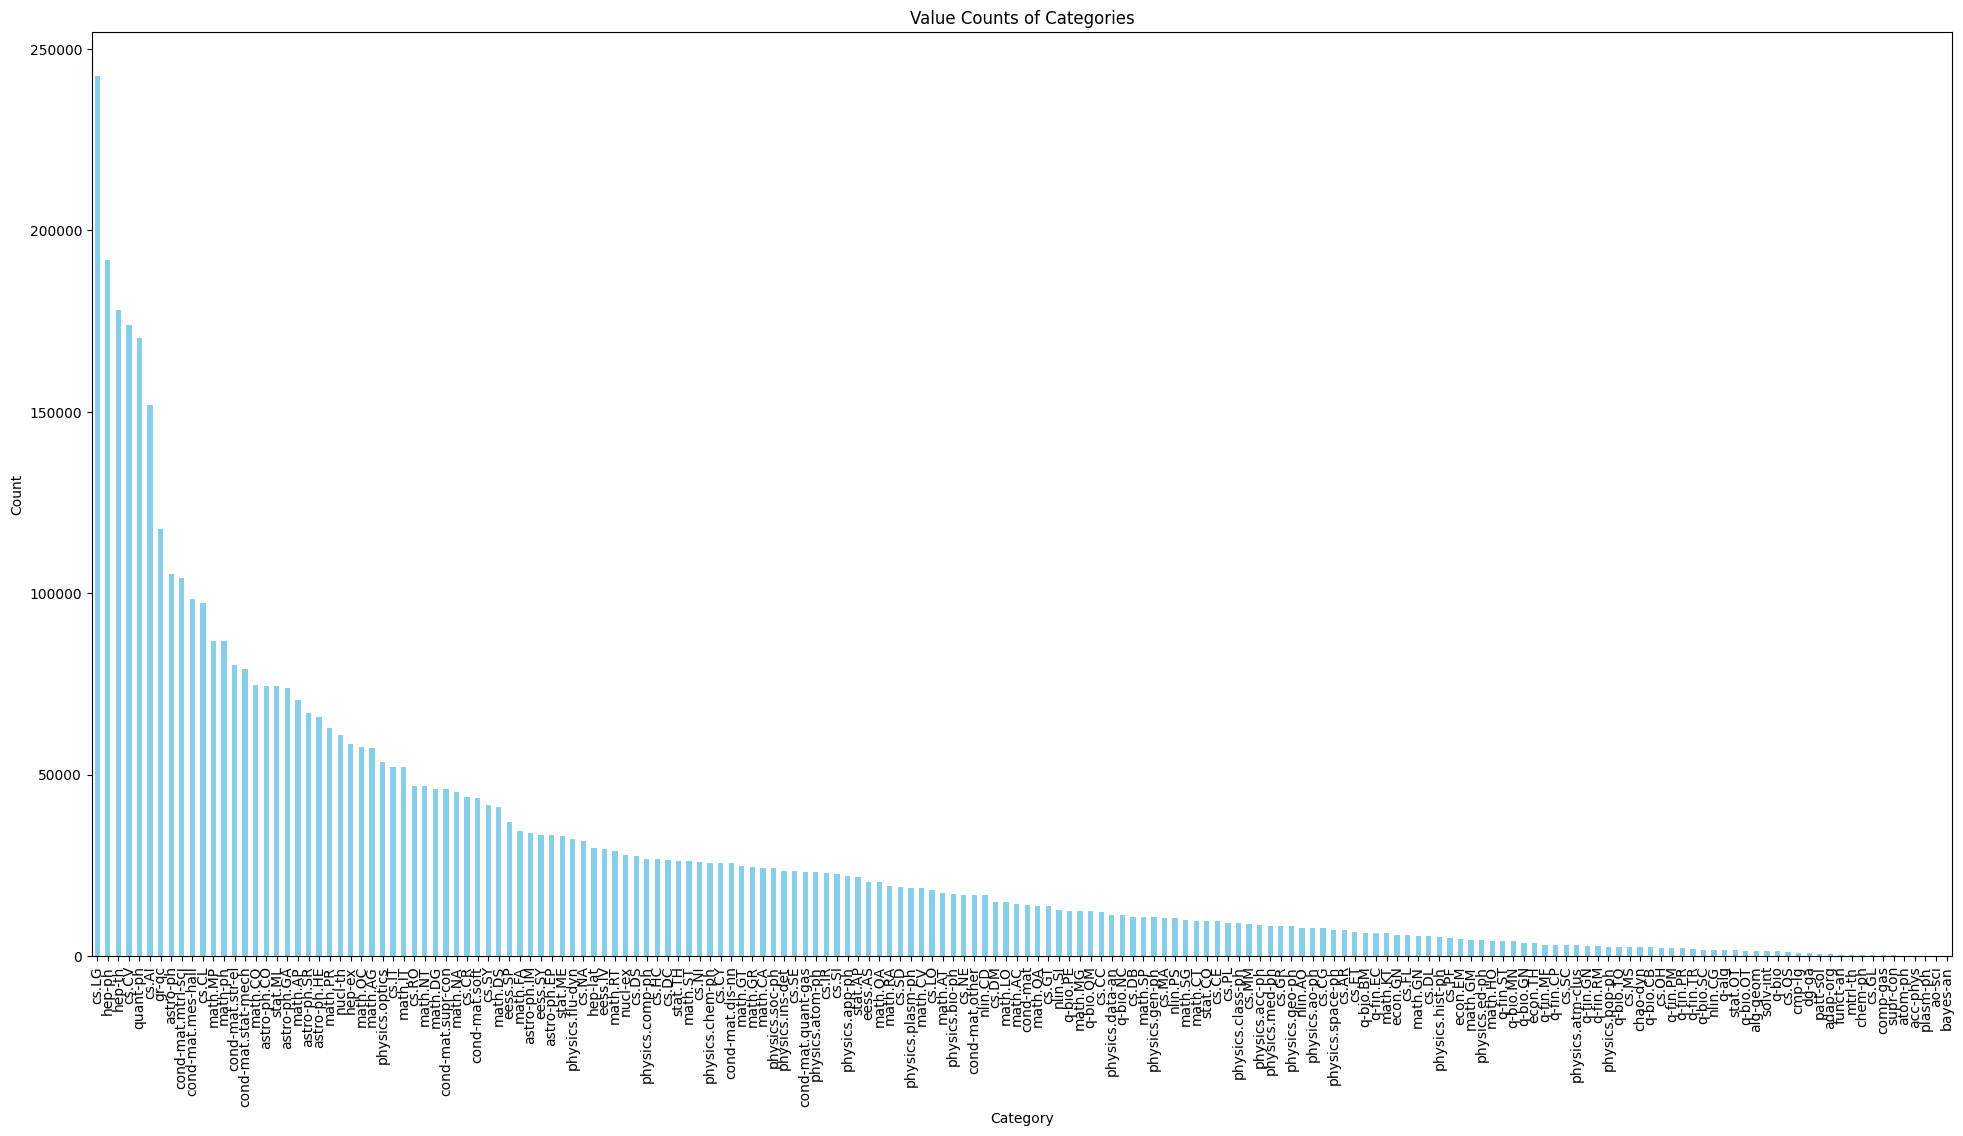

In [8]:
import matplotlib.pyplot as plt

# Plot value counts
categories_count.plot(kind='bar', color='skyblue', figsize=(24, 12))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts of Categories')
plt.show()

In [9]:
arxiv_df.to_csv('arxiv_full.csv', index=False)

In [ ]:
# The experiment is continued from here after saving the full dataset to CSV
import pandas as pd
full_df = pd.read_csv('arxiv_full.csv')
full_df.head()

,title,abstract,categories,categories_splited
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,['hep-ph']
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,"['math.CO', 'cs.CG']"
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,['physics.gen-ph']
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,['math.CO']
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,math.CA math.FA,"['math.CA', 'math.FA']"


In [3]:
from ast import literal_eval
full_df['categories_splited'] = full_df['categories_splited'].apply(literal_eval)

In [4]:
full_df.head()

,title,abstract,categories,categories_splited
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,[hep-ph]
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,"[math.CO, cs.CG]"
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,[physics.gen-ph]
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,[math.CO]
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,math.CA math.FA,"[math.CA, math.FA]"


In [5]:
def get_parent(label):
    return label.split('.')[0]

In [6]:
full_df['parent_categories'] = full_df['categories_splited'].apply(lambda x: [get_parent(cat) for cat in x])

In [7]:
full_df.head()

,title,abstract,categories,categories_splited,parent_categories
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,[hep-ph],[hep-ph]
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,"[math.CO, cs.CG]","[math, cs]"
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,[physics.gen-ph],[physics]
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,[math.CO],[math]
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,math.CA math.FA,"[math.CA, math.FA]","[math, math]"


In [28]:
arxiv_df.to_csv('arxiv_dataset_processed.csv', index=False)

In [ ]:
# The experiment is continued from here after saving the processed dataset to CSV

import pandas as pd
arxiv_df = pd.read_csv('arxiv_dataset_processed.csv')

In [6]:
from ast import literal_eval
arxiv_df['categories_splited'] = arxiv_df['categories_splited'].apply(literal_eval)

In [14]:
type(arxiv_df.loc[0, 'parent_categories'])

list

In [ ]:
# helper function to count number of categories
def count_categories(cat_list):
    return len(list(cat_list))

In [ ]:
# helper function to get unique parent categories
def get_unique_parent_categories(cat_list):
    return list(set(cat_list))

In [10]:
full_df['categories_count'] = full_df['categories_splited'].apply(lambda x: count_categories(x))

In [11]:
full_df['unique_parent_categories'] = full_df['parent_categories'].apply(lambda x: get_unique_parent_categories(x))

In [12]:
full_df['parent_categories_count'] = full_df['unique_parent_categories'].apply(lambda x: count_categories(x))

In [14]:
# Create subset to train multi-class classifier. Only samples with single parent category.
arxiv_df_single_parent = full_df[full_df['parent_categories_count'] == 1]

In [18]:
parent_categories_count = full_df['unique_parent_categories'].explode().value_counts()

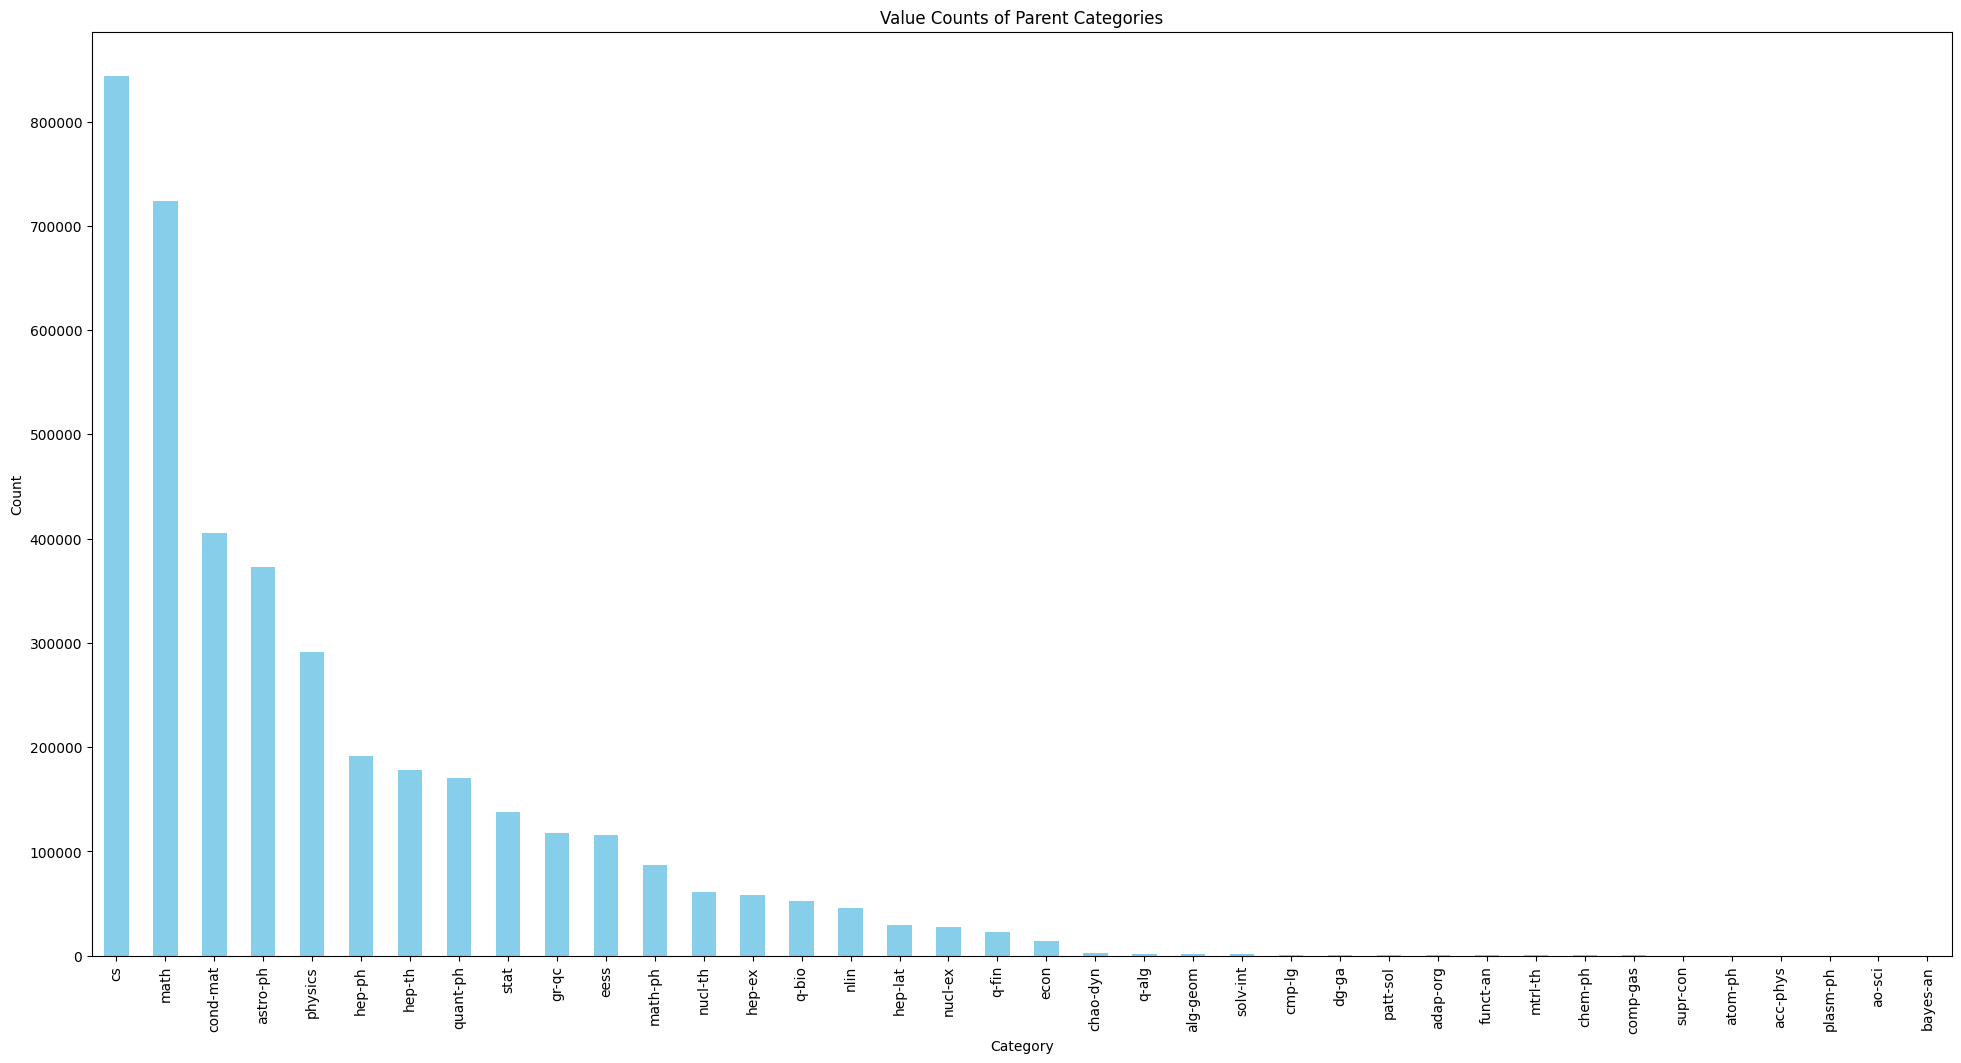

In [ ]:
import matplotlib.pyplot as plt

# Plot value counts
parent_categories_count.plot(kind='bar', color='skyblue', figsize=(24, 12))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts of Parent Categories')
plt.show()

In [20]:
# List of parent categories with more than 10000 samples
parent_categories_over_10k = parent_categories_count[parent_categories_count > 10000]
# List of parent categories with more than 1000 samples
parent_categories_over_1k = parent_categories_count[parent_categories_count > 1000]

In [21]:
parent_categories_over_10k

unique_parent_categories
cs          843985
math        724151
cond-mat    405823
astro-ph    373245
physics     291530
hep-ph      191810
hep-th      177961
quant-ph    170398
stat        138077
gr-qc       117690
eess        115602
math-ph      86880
nucl-th      61032
hep-ex       58360
q-bio        52699
nlin         45711
hep-lat      29667
nucl-ex      27733
q-fin        23119
econ         13860
Name: count, dtype: int64

In [22]:
parent_categories_over_1k

unique_parent_categories
cs          843985
math        724151
cond-mat    405823
astro-ph    373245
physics     291530
hep-ph      191810
hep-th      177961
quant-ph    170398
stat        138077
gr-qc       117690
eess        115602
math-ph      86880
nucl-th      61032
hep-ex       58360
q-bio        52699
nlin         45711
hep-lat      29667
nucl-ex      27733
q-fin        23119
econ         13860
chao-dyn      2398
q-alg         1578
alg-geom      1423
solv-int      1413
Name: count, dtype: int64

In [ ]:
# The difference between parent categories over 1k and over 10k is only 5 categories

In [23]:
# List of parent categories with less than 1000 samples
parent_categories_under_1k = parent_categories_count[parent_categories_count < 1000]
parent_categories_under_1k

unique_parent_categories
cmp-lg      894
dg-ga       732
patt-sol    650
adap-org    584
funct-an    427
mtrl-th     262
chem-ph     251
comp-gas    221
supr-con    175
atom-ph     123
acc-phys     49
plasm-ph     38
ao-sci       17
bayes-an     16
Name: count, dtype: int64

In [25]:
# All unique parent categories
parent_categories_count.index.tolist()

['cs',
 'math',
 'cond-mat',
 'astro-ph',
 'physics',
 'hep-ph',
 'hep-th',
 'quant-ph',
 'stat',
 'gr-qc',
 'eess',
 'math-ph',
 'nucl-th',
 'hep-ex',
 'q-bio',
 'nlin',
 'hep-lat',
 'nucl-ex',
 'q-fin',
 'econ',
 'chao-dyn',
 'q-alg',
 'alg-geom',
 'solv-int',
 'cmp-lg',
 'dg-ga',
 'patt-sol',
 'adap-org',
 'funct-an',
 'mtrl-th',
 'chem-ph',
 'comp-gas',
 'supr-con',
 'atom-ph',
 'acc-phys',
 'plasm-ph',
 'ao-sci',
 'bayes-an']

In [24]:
arxiv_df_single_parent.shape

(2077116, 8)

In [25]:
arxiv_df_single_parent.head()

,title,abstract,categories,categories_splited,parent_categories,categories_count,unique_parent_categories,parent_categories_count
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,[hep-ph],[hep-ph],1,[hep-ph],1
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,[physics.gen-ph],[physics],1,[physics],1
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,[math.CO],[math],1,[math],1
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,math.CA math.FA,"[math.CA, math.FA]","[math, math]",2,[math],1
5,Bosonic characters of atomic Cooper pairs acro...,We study the two-particle wave function of p...,cond-mat.mes-hall,[cond-mat.mes-hall],[cond-mat],1,[cond-mat],1


In [26]:
def list_to_string(list_labels):
    return list_labels[0]

In [29]:
list_to_string(arxiv_df_single_parent['unique_parent_categories'][0])

'hep-ph'

In [27]:
arxiv_df_single_parent['unique_parent_categories'] = arxiv_df_single_parent['unique_parent_categories'].apply(list_to_string)

/tmp/ipykernel_125082/2908600674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arxiv_df_single_parent['unique_parent_categories'] = arxiv_df_single_parent['unique_parent_categories'].apply(list_to_string)


In [28]:
list_of_labels = arxiv_df_single_parent['unique_parent_categories'].explode().unique().tolist()
list_of_labels

['hep-ph',
 'physics',
 'math',
 'cond-mat',
 'gr-qc',
 'astro-ph',
 'hep-th',
 'hep-ex',
 'nlin',
 'q-bio',
 'cs',
 'nucl-th',
 'quant-ph',
 'nucl-ex',
 'hep-lat',
 'stat',
 'q-fin',
 'eess',
 'econ']

In [29]:
# Create subsets for every label
df_200 = pd.DataFrame()
for label in list_of_labels:
    df = arxiv_df_single_parent[arxiv_df_single_parent['unique_parent_categories'] == label].sample(200, random_state=42)
    df_200 = pd.concat([df_200, df], ignore_index=True)

In [30]:
df_200.shape

(3800, 8)

In [31]:
df_200.head()

,title,abstract,categories,categories_splited,parent_categories,categories_count,unique_parent_categories,parent_categories_count
0,High Momentum Dilepton Production from Jets in...,We discuss the emission of high momentum lep...,hep-ph,[hep-ph],[hep-ph],1,hep-ph,1
1,Investigating the ratio of CKM matrix elements...,"In this paper, we calculate the ratio of Cab...",hep-ph,[hep-ph],[hep-ph],1,hep-ph,1
2,CP Violation from Slepton Oscillations at the ...,In supersymmetric theories the charged slept...,hep-ph,[hep-ph],[hep-ph],1,hep-ph,1
3,Anomalous Higgs Couplings at the LHeC,The discovery of Higgs boson plays a crucial...,hep-ph,[hep-ph],[hep-ph],1,hep-ph,1
4,Multicomponent Dark Matter in Radiative Seesaw...,"We discuss radiative seesaw models, in which...",hep-ph,[hep-ph],[hep-ph],1,hep-ph,1


In [32]:
df_200 = df_200.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the dataframe
df_200 = df_200[['title', 'abstract', 'categories', 'categories_splited', 'parent_categories', 'unique_parent_categories']]
df_200.to_csv('arxiv_multiclass_200_per_class.csv', index=False)

In [33]:
id2label = {i: label for i, label in enumerate(list_of_labels)}
label2id = {label: i for i, label in enumerate(list_of_labels)}
id2label

{0: 'hep-ph',
 1: 'physics',
 2: 'math',
 3: 'cond-mat',
 4: 'gr-qc',
 5: 'astro-ph',
 6: 'hep-th',
 7: 'hep-ex',
 8: 'nlin',
 9: 'q-bio',
 10: 'cs',
 11: 'nucl-th',
 12: 'quant-ph',
 13: 'nucl-ex',
 14: 'hep-lat',
 15: 'stat',
 16: 'q-fin',
 17: 'eess',
 18: 'econ'}

In [34]:
df_200['label_id'] = df_200['unique_parent_categories'].map(label2id)

In [35]:
dataset = df_200[['title', 'abstract', 'label_id']].reset_index(drop=True)
dataset['text'] = dataset['title'] + "\t" + dataset['abstract']
dataset = dataset[['text', 'label_id']]
dataset = dataset.rename(columns={'label_id': 'label'})

In [36]:
dataset.head()

,text,label
0,AA Tau's sudden and long-lasting deepening: en...,5
1,New non-arithmetic complex hyperbolic lattices...,2
2,On the moduli space of Donaldson-Thomas instan...,2
3,On the Dissipation of Ideal Hamiltonian Monte ...,15
4,Doubly Robust Criterion for Causal Inference\t...,15


In [ ]:
# Split dataset into train, validation and test sets 
# in proportion 80/10/10 

dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
train_size = int(0.8 * len(dataset))
val_size =  int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size 

train_dataset = dataset.iloc[:train_size]
val_dataset = dataset.iloc[train_size:train_size + val_size]
test_dataset = dataset.iloc[train_size + val_size:]
train_dataset.shape, val_dataset.shape, test_dataset.shape


((3040, 2), (380, 2), (380, 2))

In [ ]:
# Write datasets to CSV files for reproducibility
train_dataset.to_csv('arxiv_200_multiclass_train.csv', index=False)
val_dataset.to_csv('arxiv_200_multiclass_val.csv', index=False)
test_dataset.to_csv('arxiv_200_multiclass_test.csv', index=False)

In [5]:
list_of_labels = ['hep-ph',
 'physics',
 'math',
 'cond-mat',
 'gr-qc',
 'astro-ph',
 'hep-th',
 'hep-ex',
 'nlin',
 'q-bio',
 'cs',
 'nucl-th',
 'quant-ph',
 'nucl-ex',
 'hep-lat',
 'stat',
 'q-fin',
 'eess',
 'econ']
id2label = {i: label for i, label in enumerate(list_of_labels)}
label2id = {label: i for i, label in enumerate(list_of_labels)}